In [ ]:
from kafka import KafkaConsumer
from kafka import KafkaProducer

In [ ]:
# 효율과 자원의 한계로 인해 작성 과정에서는 HDFS에 저장후에 다시 불러들여 사용하였습니다.

df = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:9092") \
    .option("subscribe", "topic") \
    .option("checkpointLocation", "/test/checkpoint")\
    .option("failOnDataLoss", "false")\
    .load()

res = df.select('*')

df.printSchema()

In [ ]:
query = res.writeStream.outputMode("append") \
    .format("console") \
    .option("checkpointLocation", "/test/checkpoint") \
    .option("path", '/TPDATA') \
    .start()

query.awaitTermination()

In [ ]:
query.stop()

print(spark.version)

In [8]:
from pyspark.sql.types import*
from pyspark.sql.functions import round
from pyspark.sql.functions import avg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
    
schema = [StructField('시도명', StringType(), True), StructField('시군구명', StringType(), True),
          StructField('기준년도', IntegerType(), True), StructField('Jan', DoubleType(), True),
          StructField('Feb', DoubleType(), True), StructField('Mar', DoubleType(), True),
          StructField('Apr', DoubleType(), True), StructField('May', DoubleType(), True),
          StructField('Jun', DoubleType(), True), StructField('Jul', DoubleType(), True),
          StructField('Aug', DoubleType(), True), StructField('Sep', DoubleType(), True),
          StructField('Oct', DoubleType(), True), StructField('Nov', DoubleType(), True),
          StructField('Dec', DoubleType(), True)]

struct = StructType(fields = schema)

seoul_data = spark.read.csv('/sparkdata/TP/seoul_pol.csv', sep = ",", header = True,
                     schema = struct, encoding='euc-kr')
busan_data = spark.read.csv('/sparkdata/TP/pusan_pol.csv', sep = ",", header = True,
                     schema = struct, encoding='euc-kr')
incheon_data = spark.read.csv('/sparkdata/TP/incheon_pol.csv', sep = ",", header = True,
                     schema = struct, encoding='euc-kr')

+----+--------------------------------------------+--------------------------------------------+----------------------------------------------+
|Year|Average Land Price Fluctuation Rate of Seoul|Average Land Price Fluctuation Rate of Busan|Average Land Price Fluctuation Rate of Incheon|
+----+--------------------------------------------+--------------------------------------------+----------------------------------------------+
|2005|                           52.40300000000001|                          14.328645833333333|                             39.07685185185184|
|2006|                           72.65066666666668|                                  18.8171875|                            39.949074074074076|
|2007|                                      47.613|                                   16.478125|                            36.348148148148155|
|2008|                          -4.518333333333332|                          -3.788541666666667|                              5.95925925

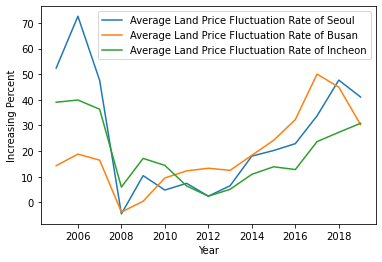

In [204]:
                        #NULL값이 있는 열 삭제
seoul_pol = seoul_data.dropna() \
            .withColumn("Avg", (seoul_data.Jan + seoul_data.Feb + seoul_data.Mar \
                                 + seoul_data.Apr + seoul_data.May + seoul_data.Jun \
                                 + seoul_data.Jul + seoul_data.Aug + seoul_data.Sep \
                                 + seoul_data.Oct + seoul_data.Nov + seoul_data.Dec)/12*100) \
            .select('기준년도', 'Avg').groupBy('기준년도').mean() \
            .drop('avg(기준년도)') \
            .select(col("기준년도").alias("Year"), col("avg(Avg)") \
                .alias("Average Land Price Fluctuation Rate of Seoul")) \
                .orderBy("Year", ascending=True)
                        #null값이 있는 행 제거(오차를 줄이기 위함)
busan_pol = busan_data.dropna() \
            .withColumn("Avg", (busan_data.Jan + busan_data.Feb + busan_data.Mar \
                                 + busan_data.Apr + busan_data.May + busan_data.Jun \
                                 + busan_data.Jul + busan_data.Aug + busan_data.Sep \
                                 + busan_data.Oct + busan_data.Nov + busan_data.Dec)/12*100) \
            .select('기준년도', 'Avg').groupBy('기준년도').mean() \
            .drop('avg(기준년도)') \
            .select(col("기준년도").alias("Year"), col("avg(Avg)") \
                .alias("Average Land Price Fluctuation Rate of Busan")) \
                .orderBy("Year", ascending=True)     #스키마 변경

incheon_pol = incheon_data.dropna() \
            .withColumn("Avg", (incheon_data.Jan + incheon_data.Feb + incheon_data.Mar \
                                 + incheon_data.Apr + incheon_data.May + incheon_data.Jun \
                                 + incheon_data.Jul + incheon_data.Aug + incheon_data.Sep \
                                 + incheon_data.Oct + incheon_data.Nov + incheon_data.Dec)/12*100) \
            .select('기준년도', 'Avg').groupBy('기준년도').mean() \
            .drop('avg(기준년도)') \
            .select(col("기준년도").alias("Year"), col("avg(Avg)") \
                .alias("Average Land Price Fluctuation Rate of Incheon"))    #스키마 변경
                                     
    
pol = seoul_pol.join(busan_pol, "Year", "Right")
pol = pol.join(incheon_pol, "Year", "Right").orderBy("Year", ascending=True)
pol.show()

pd_pol = pol.toPandas().plot(kind = 'line', x = 'Year', y = ['Average Land Price Fluctuation Rate of Seoul', \
                                                             'Average Land Price Fluctuation Rate of Busan', \
                                                             'Average Land Price Fluctuation Rate of Incheon']
                             , xlabel = 'Year', ylabel = 'Increasing Percent')

In [7]:
############################################# 집값 데이터 ##################################################
############################################# 집값 데이터 ##################################################
############################################# 집값 데이터 ##################################################
############################################# 집값 데이터 ##################################################
############################################# 집값 데이터 ##################################################

In [205]:
sch = [StructField('Year', StringType(), True), StructField('Sum', DoubleType(), True),
      StructField('utw', DoubleType(), True), StructField('utf', DoubleType(), True),
      StructField('uth', DoubleType(), True), StructField('utt', DoubleType(), True),
      StructField('ufo', DoubleType(), True), StructField('uff', DoubleType(), True),
      StructField('ufi', DoubleType(), True)]

structure = StructType(fields = sch)

seoul_data = spark.read.csv('/sparkdata/TP/seoul_fr.csv', sep = ",", header = True,
                     schema = structure, encoding='euc-kr')
busan_data = spark.read.csv('/sparkdata/TP/busan_fr.csv', sep = ",", header = True,
                     schema = structure, encoding='euc-kr')
incheon_data = spark.read.csv('/sparkdata/TP/incheon_fr.csv', sep = ",", header = True,
                     schema = structure, encoding='euc-kr')

+----+-------------------------------+-------------------------------+---------------------------------+
|Year|Average Fertility Rate of Seoul|Average Fertility Rate of Busan|Average Fertility Rate of Incheon|
+----+-------------------------------+-------------------------------+---------------------------------+
|2005|               93.6683417085427|              87.63819095477385|               107.13567839195981|
|2006|              98.19095477386935|                           90.0|               110.40201005025128|
|2007|             106.83417085427136|             100.90452261306532|               124.42211055276383|
|2008|             101.45728643216079|              97.33668341708542|               118.14070351758794|
|2009|              97.48743718592964|              94.67336683417086|               114.97487437185929|
|2010|             103.16582914572862|             105.87939698492464|               122.76381909547737|
|2011|             103.11557788944722|              109

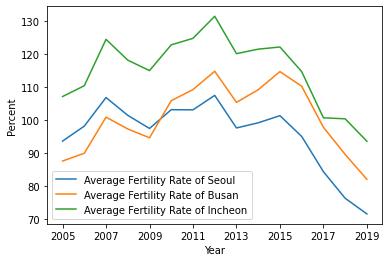

In [206]:
seoul_fr = seoul_data.dropna() \
            .withColumn("Avg", (seoul_data.utw + seoul_data.utf + seoul_data.uth \
                                 + seoul_data.utt + seoul_data.ufo + seoul_data.uff \
                                 + seoul_data.ufi)/199*100) \
            .select(col("Year").alias("Year"), col("Avg") \
                .alias("Average Fertility Rate of Seoul")) \
                .orderBy("Year", ascending=True)

busan_fr = busan_data.dropna() \
            .withColumn("Avg", (busan_data.utw + busan_data.utf + busan_data.uth \
                                 + busan_data.utt + busan_data.ufo + busan_data.uff \
                                 + busan_data.ufi)/199*100) \
            .select(col("Year").alias("Year"), col("Avg") \
                .alias("Average Fertility Rate of Busan")) \
                .orderBy("Year", ascending=True)

incheon_fr = incheon_data.dropna() \
            .withColumn("Avg", (incheon_data.utw + incheon_data.utf + incheon_data.uth \
                                 + incheon_data.utt + incheon_data.ufo + incheon_data.uff \
                                 + incheon_data.ufi)/199*100) \
            .select(col("Year").alias("Year"), col("Avg") \
                .alias("Average Fertility Rate of Incheon")) \
                .orderBy("Year", ascending=True)

fr = seoul_fr.join(busan_fr, "Year", "Right")
fr = fr.join(incheon_fr, "Year", "Right").orderBy("Year", ascending=True)
fr.show()

pd_fr = fr.toPandas().plot(kind = 'line', x = 'Year', y = ['Average Fertility Rate of Seoul', \
                                                           'Average Fertility Rate of Busan', \
                                                           'Average Fertility Rate of Incheon', ]
                             , xlabel = 'Year', ylabel = 'Percent')



In [ ]:
############################################# 데이터 합병 ##################################################
############################################# 데이터 합병 ##################################################
############################################# 데이터 합병 ##################################################
############################################# 데이터 합병 ##################################################
############################################# 데이터 합병 ##################################################

Text(0.5, 1.0, 'Incheon')

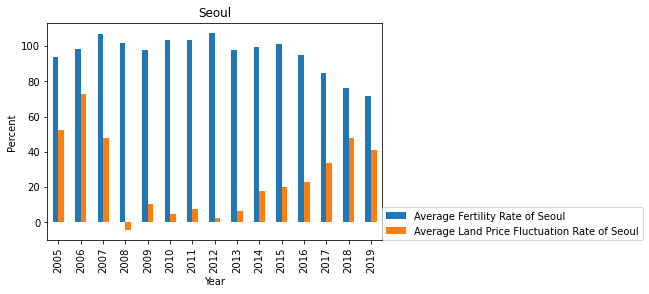

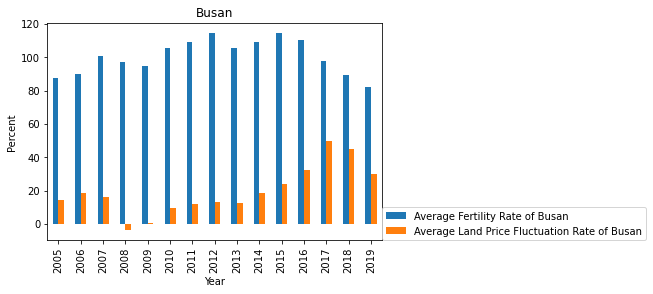

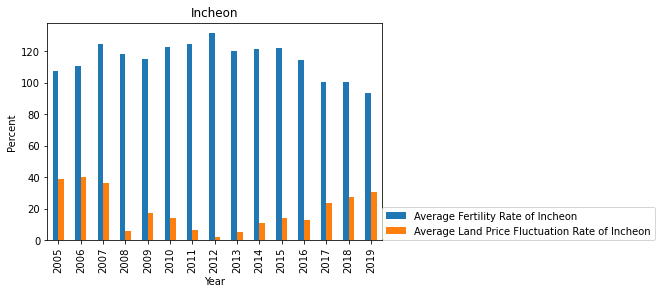

In [77]:
seoul = seoul_pol.join(seoul_fr, "Year", "Right").orderBy("Year", ascending=True)
busan = busan_pol.join(busan_fr, "Year", "Right").orderBy("Year", ascending=True)
incheon = incheon_pol.join(incheon_fr, "Year", "Right").orderBy("Year", ascending=True)

fr_pol = pol.join(fr, "Year", "Right").orderBy("Year", ascending=True)



pd_seoul = seoul.toPandas().plot(kind = 'bar', x = 'Year', y = ['Average Fertility Rate of Seoul', \
                                                                'Average Land Price Fluctuation Rate of Seoul']\
                             , xlabel = 'Year', ylabel = 'Percent')
plt.legend(loc=(1.0, 0.0))
plt.title("Seoul")

pd_busan = busan.toPandas().plot(kind = 'bar', x = 'Year', y = ['Average Fertility Rate of Busan', \
                                                                'Average Land Price Fluctuation Rate of Busan'] \
                             ,xlabel = 'Year', ylabel = 'Percent')
plt.legend(loc=(1.0, 0.0))
plt.title("Busan")

pd_incheon = incheon.toPandas().plot(kind = 'bar', x = 'Year', y = ['Average Fertility Rate of Incheon', \
                                                                    'Average Land Price Fluctuation Rate of Incheon'] \
                             ,xlabel = 'Year', ylabel = 'Percent')
plt.legend(loc=(1.0, 0.0))
plt.title("Incheon")

<AxesSubplot:title={'center':'Merged Data'}, xlabel='Year', ylabel='Percent'>

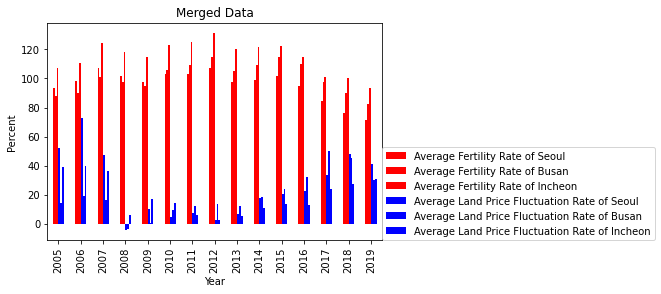

In [74]:
pd_fr_pol = fr_pol.toPandas().plot(kind = 'bar', x = 'Year', y = ['Average Fertility Rate of Seoul', \
                                                                  'Average Fertility Rate of Busan', \
                                                                  'Average Fertility Rate of Incheon', \
                                                                  'Average Land Price Fluctuation Rate of Seoul', \
                                                                  'Average Land Price Fluctuation Rate of Busan', \
                                                                  'Average Land Price Fluctuation Rate of Incheon']
                             , xlabel = 'Year', ylabel = 'Percent', color =['red', 'red', 'red', 'blue', 'blue', 'blue'])
plt.legend(loc=(1.0, 0.0))
plt.title("Merged Data")

pd_fr_pol

# plt.show()

In [3]:
print(spark.version)

3.1.3


Text(0.5, 1.0, 'Housing Price Change Rate')

/home/bigdata/anaconda3/envs/bigdata/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bigdata/anaconda3/envs/bigdata/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bigdata/anaconda3/envs/bigdata/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bigdata/anaconda3/envs/bigdata/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)


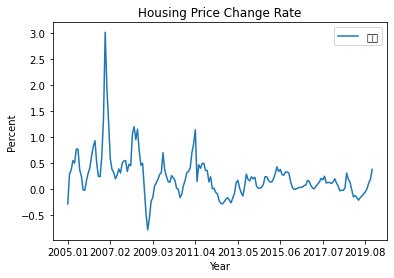

In [682]:
############################################# 전국 집값 데이터 ##################################################
############################################# 전국 집값 데이터 ##################################################
############################################# 전국 집값 데이터 ##################################################
############################################# 전국 집값 데이터 ##################################################
############################################# 전국 집값 데이터 ##################################################

house_schema = [StructField('시점', StringType(), True), StructField('전국', DoubleType(), True)]

structure = StructType(fields = house_schema)

house_data = spark.read.option("header", True).csv('/TPDATA/house.csv', encoding='euc-kr', schema = structure)

five = house_data.select(col("시점"), col("전국"))

fivplt = five.toPandas().plot(kind = 'line', x = '시점', y = ['전국'], xlabel = 'Year', ylabel = 'Percent')
plt.title('Housing Price Change Rate')

In [9]:
ML_schema = [StructField('Year_Month', StringType(), True), StructField('Birth', DoubleType(), True),
                StructField('CrudeB', DoubleType(), True), StructField('Death', DoubleType(), True),
                StructField('CrudeD', StringType(), True), StructField('Nat', DoubleType(), True),
                StructField('NatRate', StringType(), True), StructField('Marrage', DoubleType(), True),
                StructField('CrudeM', DoubleType(), True), StructField('divorce', DoubleType(), True), 
                StructField('CrudeDiv', DoubleType(), True), StructField('Sell', DoubleType(), True),
                StructField('HPCR', DoubleType(), True)]

structure = StructType(fields = ML_schema)

rate_data = spark.read.option("header", True).csv('/TPDATA/FR_PO.csv', encoding='euc-kr', schema = structure)

rate_data = rate_data.dropna().withColumn("CrudeB_Rate", (rate_data.CrudeB) >= 8)
rate_data = rate_data.withColumn("CrudeM_Rate", (rate_data.CrudeM) >= 5)
rate_data = rate_data.withColumn("CrudeDiv_Rate", (rate_data.CrudeDiv) >= 2.3)
rate_data = rate_data.withColumn("HPCR_Rate", (rate_data.HPCR) > 0)
rate_data = rate_data.withColumn("CrudeB_Rate", col("CrudeB_Rate").cast("string")) # 자료형 전환
rate_data = rate_data.withColumn("CrudeM_Rate", col("CrudeM_Rate").cast("string"))
rate_data = rate_data.withColumn("CrudeDiv_Rate", col("CrudeDiv_Rate").cast("string"))
rate_data = rate_data.withColumn("HPCR_Rate", col("HPCR_Rate").cast("string"))  

rate_data.select('Year_Month', 'HPCR', 'CrudeB').show()

+----------+-----+------+
|Year_Month| HPCR|CrudeB|
+----------+-----+------+
|   2005.01|0.157|  10.0|
|   2005.02|0.123|   9.6|
|   2005.03|0.278|   9.9|
|   2005.04|0.455|   9.2|
|   2005.05|0.434|   8.7|
|   2005.06| 0.75|   8.4|
|   2005.07|0.363|   8.4|
|   2005.08|0.464|   8.7|
|   2005.09| 0.15|   9.3|
|   2005.10|0.299|   9.0|
|   2005.11|  2.0|   8.9|
|   2005.12|0.312|   8.0|
|   2006.01|0.295|   9.8|
|   2006.02|0.386|  10.0|
|   2006.03|0.541|   9.9|
|   2006.04|0.519|   9.4|
|   2006.05|  2.0|   9.1|
|   2006.06|0.453|   8.8|
|   2006.07|0.428|   8.5|
|   2006.08|0.435|   9.0|
+----------+-----+------+
only showing top 20 rows



In [661]:
newSch = [StructField('Year_Month', StringType(), True), StructField('CrudeB', DoubleType(), True),  StructField('HPCR', DoubleType(), True)]
structure = StructType(fields = newSch)
rate_new = spark.read.option("header", True).csv('/TPDATA/testfor.csv', encoding='euc-kr', schema = structure)

<AxesSubplot:xlabel='HPCR', ylabel='CrudeB'>

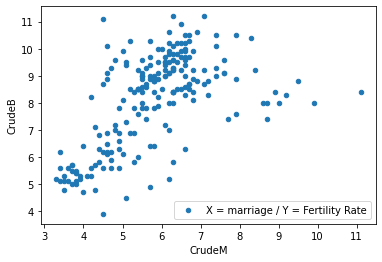

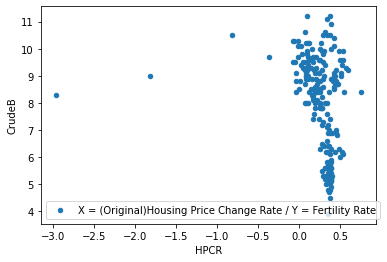

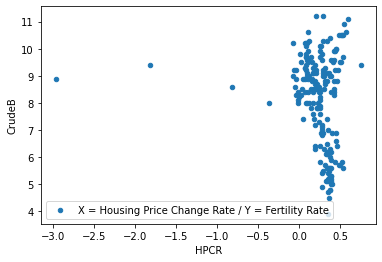

In [669]:
old_panda = rate_data.select('HPCR', 'CrudeB').toPandas()
rate_panda = rate_new.select('HPCR', 'CrudeB').toPandas()
marriage = rate_data.select('CrudeM', 'CrudeB').toPandas()

marriage.plot(kind = 'scatter', x = 'CrudeM', y = 'CrudeB', label = 'X = marriage / Y = Fertility Rate') # 산점도 추출,
old_panda.plot(kind = 'scatter', x = 'HPCR', y = 'CrudeB', label = 'X = (Original)Housing Price Change Rate / Y = Fertility Rate') # 산점도 추출,
rate_panda.plot(kind = 'scatter', x = 'HPCR', y = 'CrudeB', label = 'X = Housing Price Change Rate / Y = Fertility Rate') # 산점도 추출,

In [10]:
train, test = rate_data.randomSplit([0.7, 0.3])

print("Training : %d, Test : %d" % (train.count(), test.count()))

Training : 139, Test : 68


In [11]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

categoricalCols = ["HPCR_Rate", "CrudeM_Rate", "CrudeDiv_Rate"]

stringIndexer = StringIndexer(inputCols=categoricalCols, outputCols=[x + "Index" for x in categoricalCols]) 

encoder = OneHotEncoder(inputCols=stringIndexer.getOutputCols(), outputCols=[x + "OHE" for x in categoricalCols]) 

labelToIndex = StringIndexer(inputCol="CrudeB_Rate", outputCol="label")

stringIndexerModel = stringIndexer.fit(train)
stringIndexerModel.transform(train).show()

+----------+-------+------+-------+------+-------+-------+-------+------+-------+--------+-----------+-----+-----------+-----------+-------------+---------+--------------+----------------+------------------+
|Year_Month|  Birth|CrudeB|  Death|CrudeD|    Nat|NatRate|Marrage|CrudeM|divorce|CrudeDiv|       Sell| HPCR|CrudeB_Rate|CrudeM_Rate|CrudeDiv_Rate|HPCR_Rate|HPCR_RateIndex|CrudeM_RateIndex|CrudeDiv_RateIndex|
+----------+-------+------+-------+------+-------+-------+-------+------+-------+--------+-----------+-----+-----------+-----------+-------------+---------+--------------+----------------+------------------+
|   2005.02|35810.0|   9.6|19057.0|   5.1|16753.0|    4.5|20633.0|   5.5| 9639.0|     2.6|59.45705474|0.123|       true|       true|         true|     true|           0.0|             0.0|               1.0|
|   2005.03|41052.0|   9.9|21855.0|   5.3|19197.0|    4.6|26928.0|   6.5|12071.0|     2.9|       59.0|0.278|       true|       true|         true|     true|           0

In [12]:
from pyspark.ml.feature import VectorAssembler

# "Death", "Marrage", "CrudeM", "divorce", "CrudeDiv"
numericCols = ["Nat", "CrudeDiv", "Death", "Nat", "divorce"]
assemblerInputs = [c + "OHE" for c in categoricalCols] + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

In [13]:
from pyspark.ml.classification import LogisticRegression
    
lr = LogisticRegression(featuresCol="features", labelCol="label", regParam=1)

In [14]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[stringIndexer, encoder, labelToIndex, vecAssembler, lr])

pipelineModel = pipeline.fit(train)

predDF = pipelineModel.transform(test)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(metricName = "areaUnderROC")

print("예측 정확도 : ", evaluator.evaluate(predDF))

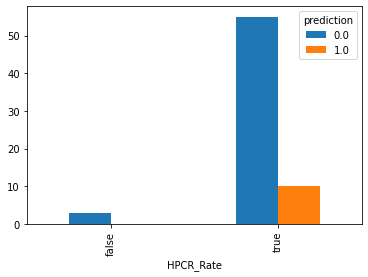

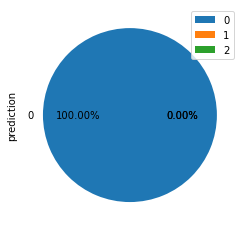

In [65]:
HPCRRATEDF = predDF.select('HPCR_Rate','prediction').groupby('HPCR_Rate','prediction').count().toPandas()
HPCRRATEDF_pd = HPCRRATEDF.pivot_table('count', index='HPCR_Rate', columns='prediction')
HPCRRATEDF_pd.plot.bar()

# HPCRRATEDF = predDF.select('prediction','HPCR_Rate').groupby('prediction','HPCR_Rate').count().toPandas()

# HPCRRATEDF_pd = HPCRRATEDF.plot(kind = 'pie', x='HPCR_Rate', y='prediction', autopct='%.2f%%')

In [61]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.7, 2.0]) \
.addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
.build()

cv = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)

cvModel = cv.fit(train)

cvPredDF = cvModel.transform(test)

print("예측 정확도: ", evaluator.evaluate(cvPredDF))

예측 정확도:  0.9604863221884499


<AxesSubplot:xlabel='HPCR_Rate'>

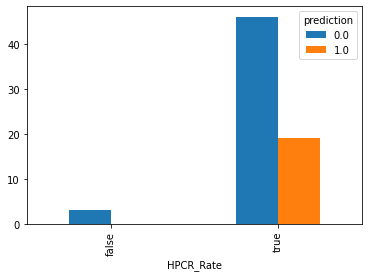

In [62]:
HPCRRATEDF = cvPredDF.select('HPCR_Rate','prediction').groupby('HPCR_Rate','prediction').count().toPandas()
HPCRRATEDF_pd = HPCRRATEDF.pivot_table('count', index='HPCR_Rate', columns='prediction')
HPCRRATEDF_pd.plot.bar()

<AxesSubplot:xlabel='CrudeM'>

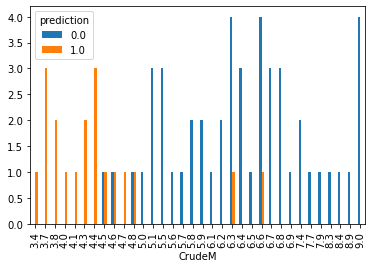

In [79]:
tpocc_df = cvPredDF.select('CrudeM','prediction').groupby('CrudeM','prediction').count().toPandas()
tpocc_pv = tpocc_df.pivot_table('count', index='CrudeM', columns='prediction')
tpocc_pv.plot.bar()

<AxesSubplot:xlabel='CrudeDiv'>

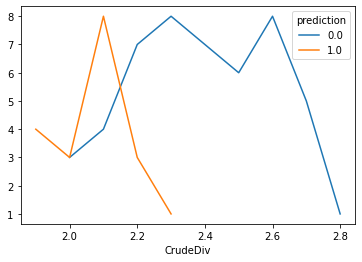

In [82]:
tpocc_df = cvPredDF.select('CrudeDiv','prediction').groupby('CrudeDiv','prediction').count().toPandas()
tpocc_pv = tpocc_df.pivot_table('count', index='CrudeDiv', columns='prediction')
tpocc_pv.plot.line()